In [1]:
import os

base_dir = 'Upper_Split/train'

anorak_dir = os.path.join(base_dir, 'Anorak')
blazer_dir = os.path.join(base_dir, 'Blazer')

print('total training anorak images:', len(os.listdir(anorak_dir)))
print('total training blazer images:', len(os.listdir(blazer_dir)))

anorak_files = os.listdir(anorak_dir)
print(anorak_files[:10])

blazer_files = os.listdir(blazer_dir)
print(blazer_files[:10])


total training anorak images: 128
total training blazer images: 3505
['anorak (1).jpg', 'anorak (100).jpg', 'anorak (101).jpg', 'anorak (102).jpg', 'anorak (103).jpg', 'anorak (107).jpg', 'anorak (108).jpg', 'anorak (109).jpg', 'anorak (11).jpg', 'anorak (110).jpg']
['blazer (1).jpg', 'blazer (100).jpg', 'blazer (1000).jpg', 'blazer (1002).jpg', 'blazer (1004).jpg', 'blazer (1005).jpg', 'blazer (1006).jpg', 'blazer (1007).jpg', 'blazer (1008).jpg', 'blazer (1009).jpg']


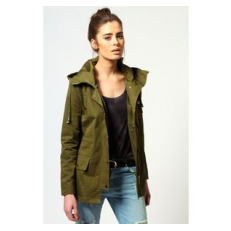

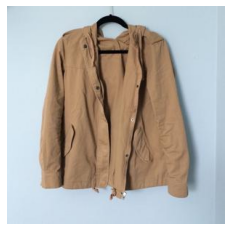

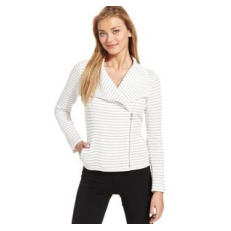

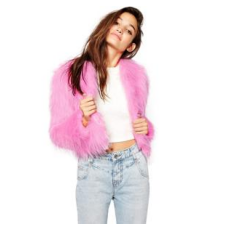

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_anorak = [os.path.join(anorak_dir, fname) 
                for fname in anorak_files[pic_index-2:pic_index]]
next_blazer = [os.path.join(blazer_dir, fname) 
                for fname in blazer_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_anorak+next_blazer):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [33]:
#large-large model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 149, 149, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 35, 35, 128)     

In [ ]:
#medium-large model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

In [ ]:
#medium-medium model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

In [44]:
from tensorflow.keras.optimizers import SGD
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "Upper_Split/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "Upper_Split/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=25
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=25
)

Found 8149 images belonging to 20 classes.
Found 2046 images belonging to 20 classes.


In [46]:
# Train the model
history = model.fit(train_generator, epochs=5, steps_per_epoch=25, validation_data = validation_generator, verbose = 1, validation_steps=2)

Epoch 1/150
25/25 [==============================] - 13s 479ms/step - loss: 2.2185 - accuracy: 0.4615 - val_loss: 2.2902 - val_accuracy: 0.4000
Epoch 2/150
25/25 [==============================] - 12s 464ms/step - loss: 2.3549 - accuracy: 0.4128 - val_loss: 2.1822 - val_accuracy: 0.4200
Epoch 3/150
25/25 [==============================] - 12s 461ms/step - loss: 2.3064 - accuracy: 0.4288 - val_loss: 2.3791 - val_accuracy: 0.3800
Epoch 4/150
25/25 [==============================] - 12s 466ms/step - loss: 2.2965 - accuracy: 0.4352 - val_loss: 2.1405 - val_accuracy: 0.4800
Epoch 5/150
25/25 [==============================] - 12s 470ms/step - loss: 2.2142 - accuracy: 0.4544 - val_loss: 2.3339 - val_accuracy: 0.3800
Epoch 6/150
25/25 [==============================] - 12s 487ms/step - loss: 2.2512 - accuracy: 0.4448 - val_loss: 2.0882 - val_accuracy: 0.5000
Epoch 7/150
25/25 [==============================] - 12s 475ms/step - loss: 2.2644 - accuracy: 0.4519 - val_loss: 2.0892 - val_accuracy:

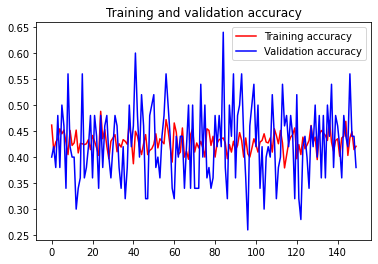

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

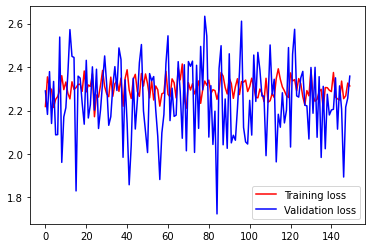

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [1]:
from scipy.stats import linregress
# Test the slope of your val_acc curve
slope, *_ = linregress(epochs, val_acc)
print(f"The slope of your validation acc is {slope:.5f}")

NameError: name 'epochs' is not defined

In [2]:
# Test the slope of your val_loss curve
slope, *_ = linregress(epochs, val_loss)
print(f"The slope of your validation loss curve is {slope:.5f}")

NameError: name 'epochs' is not defined

In [52]:
def download_history():
  import pickle
  # from google.colab import files

  with open('history_augmented.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  # files.download('history_augmented.pkl')

download_history()

In [54]:
# Save the entire model as a SavedModel.
!mkdir saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [59]:
# Save the entire model as a SavedModel.
!mkdir saved_model_HDF5
model.save('saved_model_HDF5/my_model.h5')

A subdirectory or file saved_model_HDF5 already exists.


In [60]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('saved_model_HDF5/my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 149, 149, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 35, 35, 128)     